Linear regression

In [1]:

import matplotlib.pyplot as plt

In [3]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val, y_val): 
        if self.no_bias == True:
          bias = np.ones((X.shape[0], 1))
          X = np.hstack((bias, X))
          bias = np.ones((X_val.shape[0], 1))
          X_val = np.hstack((bias, X_val))
        self.theta = np.zeros(X.shape[1])
        self.theta = self.theta.reshape(X.shape[1], 1)
        for i in range(self.iter):
          pred = self._linear_hypothesis(X)
          pred_val = self._linear_hypothesis(X_val)
          self._gradient_descent(X, y)
          loss = self._loss_func(pred, y)
          self.loss = np.append(self.loss, loss)
          loss_val = self._loss_func(pred_val, y_val)
          self.val_loss = np.append(self.val_loss, loss_val)
          if self.verbose == True:
              print('{}回目の学習の損失は{}'.format(i,loss))
        
    def predict(self, X):
        if self.no_bias == True:
            bias = np.ones(X.shape[0]).reshape(X.shape[0], 1)
            X = np.hstack([bias, X])
        pred_y = self._linear_hypothesis(X)
        return pred_y


    def _linear_hypothesis(self, X):
        """
        仮定関数の出力を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
        線形の仮定関数による推定結果
        """
        pred = X @ self.theta
        return pred


    def _gradient_descent(self, X, y):
            m = X.shape[0]
            n = X.shape[1]
            pred = self._linear_hypothesis(X)
            for j in range(n):
                gradient = 0
                for i in range(m):
                    gradient += (pred[i] - y[i]) * X[i, j]
                self.theta[j] = self.theta[j] - self.lr * (gradient / m)


    def MSE(self,y_pred, y):
        mse = ((y_pred - y) ** 2).sum() / X.shape[0]
        return mse


    def _loss_func(self,y_pred, y):
        loss = self.MSE(y_pred, y)/2
        return loss
    def plot_loss(self):
      print(self.loss)
      plt.plot(self.loss)
      plt.plot(self.val_loss)

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
dataset = pd.read_csv("train.csv")
X = dataset.loc[:, ['GrLivArea', 'YearBuilt']]
y = dataset.loc[:, ['SalePrice']]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [6]:
slr = ScratchLinearRegression(num_iter=10, lr=0.01, no_bias=True, verbose=True)
slr.fit(X_train, y_train, X_test, y_test)
slr.predict(X_test)

0回目の学習の損失は15797047701.52774
1回目の学習の損失は5.5777997076462535e+19
2回目の学習の損失は2.2001534587634176e+29
3回目の学習の損失は8.678661131538666e+38
4回目の学習の損失は3.423359396292683e+48
5回目の学習の損失は1.3503683781031775e+58
6回目の学習の損失は5.3266237794248667e+67
7回目の学習の損失は2.101124504069697e+77
8回目の学習の損失は8.288034530718848e+86
9回目の学習の損失は3.2692739649334624e+96


array([[-1.68148569e+53],
       [-1.41203761e+53],
       [-1.64327079e+53],
       [-2.23917683e+53],
       [-1.86148129e+53],
       [-1.92580149e+53],
       [-1.73919332e+53],
       [-1.49024879e+53],
       [-1.66439315e+53],
       [-1.79558327e+53],
       [-1.59621365e+53],
       [-1.50015700e+53],
       [-2.04792816e+53],
       [-1.49864386e+53],
       [-2.24824838e+53],
       [-1.87537815e+53],
       [-1.48619658e+53],
       [-1.94942176e+53],
       [-1.81200744e+53],
       [-1.61886679e+53],
       [-1.65216119e+53],
       [-1.82267922e+53],
       [-1.49234434e+53],
       [-2.21182551e+53],
       [-1.94422825e+53],
       [-1.84504647e+53],
       [-1.61268375e+53],
       [-1.69587788e+53],
       [-1.73745198e+53],
       [-2.04811520e+53],
       [-1.67059971e+53],
       [-2.01793893e+53],
       [-1.68523550e+53],
       [-1.60746672e+53],
       [-1.50481514e+53],
       [-1.92277997e+53],
       [-1.71051367e+53],
       [-1.85464052e+53],
       [-1.7

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.57970477e+10 5.57779971e+19
 2.20015346e+29 8.67866113e+38 3.42335940e+48 1.35036838e+58
 5.32662378e+67 2.10112450e+77 8.28803453e+86 3.26927396e+96]


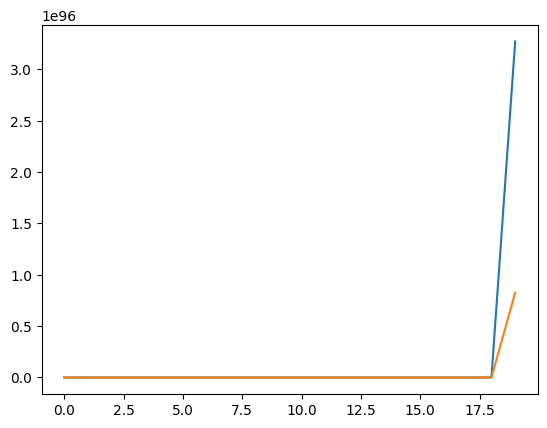

In [7]:
slr.plot_loss()